# Python for Labs/Lectures

## Lecture 1: Efficient math with NumPy

Nicholas Lee-Hone

July 2019

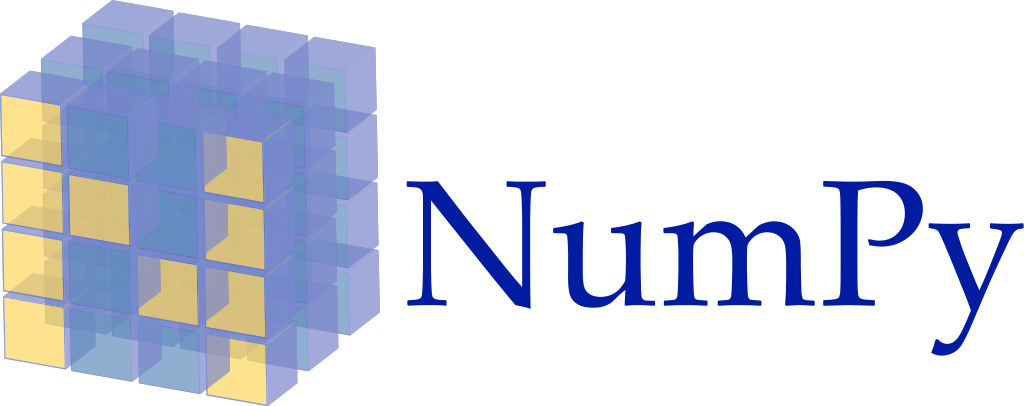

Numpy is a package for the Python programming language that introduces a N-dimensional array object. It also adds a large selection of functions that act on the array object such as trigonometric functions, linear algebra functions, discrete Fourier transform functions, and statistics.

Before we start using NumPy we need to look at how to load packages.

## Loading packages

- https://docs.python.org/3.6/reference/import.html
- http://phy224.ca/06-libraries/index.html

In [1]:
# Import a package
import numpy
numpy.sin(1)

0.8414709848078965

It would be tedious to re-write numpy every time we want to use the sine function.

In [2]:
# Import package and alias (rename) it
import numpy as np  # This is the standard way of doing it
np.sin(1)

0.8414709848078965

Renaming (aliasing) the package means we can use less keystrokes. Commonly used packages have well-adopted aliases in the Python community. For example, `numpy` is almost always aliased to `np`, which makes it easy for people to understand code they are seeing for the first time.

In [3]:
# Import part of numpy by name
from numpy import sin
sin(1)

0.8414709848078965

We can also load a variable/function/class/module from a package by name.

In [4]:
# Import part of numpy and rename it
from numpy import sin as s
s(1)

0.8414709848078965

Finally we can also alias the variable/function/class/module.

This last form of aliasing is uncommon; you have to remember the aliases, and someone seeing the code for the first time would struggle to understand what the function does without carefully reading through the import statements.

## Numpy's ndarray

- https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html
- http://phy224.ca/07-numpy/index.html

### ndarray
- n-dimensional homogeneous array of values (all same type)
- Indexing is similar to Python lists, but more powerful
- The index of a dimension is referred to as an `axis` by NumPy's functions
- Functions can be broadcast across the array
- NumPy also has a `matrix` object. **Don't use it.**

### Properties of ndarray
- ndim: Number of dimensions (`axes`) of an array
- shape: The dimensions of the array
- size: The total number of elements in the array
- dtype: The type of the elements of the array

## Creating arrays

- https://docs.scipy.org/doc/numpy/user/basics.creation.html
- http://phy224.ca/07-numpy/index.html

Arrays can be created by transforming a Python list.

In [5]:
a = np.array([1, 2, 3])

print(a)
print()
print('Dim:', a.ndim)
print('Shape:', a.shape)
print('Size:', a.size)
print('Type:', a.dtype)

[1 2 3]

Dim: 1
Shape: (3,)
Size: 3
Type: int64


In [110]:
# Arrays must have homogeneous data types so all the data is cast
# into the most complex data type
a = np.array([[1.5 + 1.j, 2, 3], [4, 5, 6]])

print(a)
print()
print('Dim:', a.ndim)
print('Shape:', a.shape)  # Tuple with two elements because ndim=2
print('Size:', a.size)
print('Type:', a.dtype)

[[1.5+1.j 2. +0.j 3. +0.j]
 [4. +0.j 5. +0.j 6. +0.j]]

Dim: 2
Shape: (2, 3)
Size: 6
Type: complex128


Arrays can also be created using the `arange` function. This function takes the same parameters as the Python `range` function, but creates a NumPy array instead of a range object.

In [119]:
# Create an array using arange (similar to range)
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

An array can be reshaped as long as the total number of elements is the same. Note that the reshape function takes a tuple (or a list) as its argument.

In [120]:
# Reshape the array and store the reshaped version
a = a.reshape((2, 5))
a

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

Arrays can be transposed using the `.T` property.

In [123]:
# Transpose the array using the .T property
a = a.T
a

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

Math functions are applied to each element in the array automatically. This is similar to MatLab's dot notation (i.e. `.*` for elementwise multiplication).

In [125]:
2*a

array([[ 0, 10],
       [ 2, 12],
       [ 4, 14],
       [ 6, 16],
       [ 8, 18]])

In [126]:
a*a

array([[ 0, 25],
       [ 1, 36],
       [ 4, 49],
       [ 9, 64],
       [16, 81]])

In [12]:
a**2

array([[ 0, 25],
       [ 1, 36],
       [ 4, 49],
       [ 9, 64],
       [16, 81]])

In [17]:
a/(2 + 1.j)

array([[0. +0.j , 2. -1.j ],
       [0.4-0.2j, 2.4-1.2j],
       [0.8-0.4j, 2.8-1.4j],
       [1.2-0.6j, 3.2-1.6j],
       [1.6-0.8j, 3.6-1.8j]])

In [127]:
10/a

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


array([[        inf,  2.        ],
       [10.        ,  1.66666667],
       [ 5.        ,  1.42857143],
       [ 3.33333333,  1.25      ],
       [ 2.5       ,  1.11111111]])

In [128]:
0*np.inf

nan

In [19]:
np.sin(a)

array([[ 0.        , -0.95892427],
       [ 0.84147098, -0.2794155 ],
       [ 0.90929743,  0.6569866 ],
       [ 0.14112001,  0.98935825],
       [-0.7568025 ,  0.41211849]])

Matrix multiplication uses the `@` symbol.

In [31]:
# Matrix multiplication
print(a.shape, a.T.shape)

a@a.T

(5, 2) (2, 5)


array([[25, 30, 35, 40, 45],
       [30, 37, 44, 51, 58],
       [35, 44, 53, 62, 71],
       [40, 51, 62, 73, 84],
       [45, 58, 71, 84, 97]])

In [32]:
print(a.T.shape, a.shape)

a.T@a

(2, 5) (5, 2)


array([[ 30,  80],
       [ 80, 255]])

In [129]:
b = np.array([3, 4])
b

array([3, 4])

In [131]:
print(b.shape, b.T.shape)
print()
print(b*b.T)
print(b@b.T)
print(b.T@b)

(2,) (2,)

[ 9 16]
25
25


## Broadcasting

Broadcasting is the process by which NumPy treats arrays of different shapes when doing arithmetic operations.

- https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html

General idea is to make copies of the elements in one array until the two arrays have the same shape and then apply the arithmetic operation.

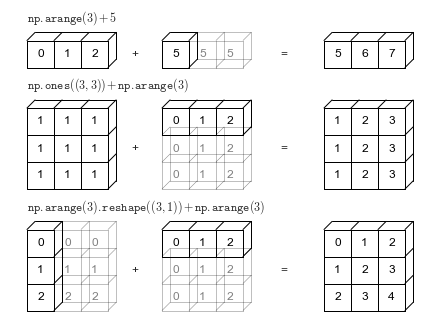
https://jakevdp.github.io/PythonDataScienceHandbook/02.05-computation-on-arrays-broadcasting.html

How to determing if two arrays are broadcastable:
- Check trailing dimensions first
- Dimensions are compatible if the are equal or if one of them is 1

From the NumPy documentation:

`Image*Scale`
```
Image  (3d array): 256 x 256 x 3
Scale  (1d array):             3
Result (3d array): 256 x 256 x 3
```

`A*B`
```
A      (4d array):  8 x 1 x 6 x 1
B      (3d array):      7 x 1 x 5
Result (4d array):  8 x 7 x 6 x 5
```

In [41]:
b = np.array([[1, 2]])
print(b.shape)
b

(1, 2)


array([[1, 2]])

In [42]:
print(a.shape)
a

(5, 2)


array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [43]:
a*b

array([[ 0, 10],
       [ 1, 12],
       [ 2, 14],
       [ 3, 16],
       [ 4, 18]])

## Indexing

- https://docs.scipy.org/doc/numpy/user/basics.indexing.html

In [48]:
# Helper function for indexing. 
# Ignore this cell for the purpose of this tutorial.

import matplotlib.pyplot as plt
import matplotlib.patches as mpatch

def plot_fancy_index(arr, indexed, fontsize=20):
    # arr is the original array
    # indexed is the indexed array that will be highlighted
    try:
        iter(indexed)
    except TypeError:
        indexed = [indexed]

    fig = plt.figure(figsize=(8,8))
    ax = plt.gca()    
    shape = arr.shape
    for v in np.nditer(arr):
        # Draw the rectangles
        y, x = -(v//shape[0]), v%shape[0]
        if v in indexed:
            # If it is in indexed highlight it in color C1
            ax.add_artist(mpatch.Rectangle((x, y), 1, -1, fc='C1', ec='k'))
        else:
            ax.add_artist(mpatch.Rectangle((x, y), 1, -1, ec='k'))
        ax.annotate(f'{v}\n{(-y, x)}', (x + 0.5, y - 0.5), color='w', weight='bold', 
                    fontsize=fontsize, ha='center', va='center')

    ax.set_xlim((0, shape[0]))
    ax.set_xticks(np.arange(shape[0]))
    ax.set_xticklabels(range(shape[0]), fontsize=16)
    ax.set_xlabel(r'Axis 1 $\rightarrow$', fontsize=20)
    
    ax.set_ylim((-shape[1], 0))
    ax.set_yticks(-np.arange(shape[1]))
    ax.set_yticklabels(range(shape[1]), fontsize=16)
    ax.set_ylabel(r'$\leftarrow$ Axis 0', fontsize=20)
    
    # Remove tick marks from left and bottom axes
    ax.tick_params(axis='both', which='both',length=0)
    
    # Top axis
    ax2 = plt.twiny()
    ax2.set_xticks(range(1, shape[0]+1))
    ax2.set_xticklabels(-np.array(list(reversed(range(1, shape[0]+1)))), fontsize=16)
    ax2.tick_params(axis='both', which='both',length=0)
    
    # Right axis
    ax3 = plt.twinx()
    ax3.set_yticks(range(shape[1]))
    ax3.set_yticklabels(-np.array(list(reversed(range(1, shape[1]+1)))), fontsize=16)
    ax3.set_ylim(0, shape[1])
    ax3.tick_params(axis='both', which='both',length=0)

    plt.show()

Indexing in NumPy works the same as for Python lists when trying to retrieve one element.

In [54]:
array = np.arange(36).reshape(6, 6)
print(array)
print()
print(array[2])
print()
print(array[2][4])

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]

[12 13 14 15 16 17]

16


Indexing in NumPy is more powerful since we can slice along multiple axes by putting a comma in between the axes.

In [63]:
print(array)
print()
print(array[2][4])  # Indexing like a list
print()
print(array[2, 4])  # NumPy indexing
print()
print(array[1:-1, ::2])

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]
 [24 25 26 27 28 29]
 [30 31 32 33 34 35]]

16

16

[[ 6  8 10]
 [12 14 16]
 [18 20 22]
 [24 26 28]]


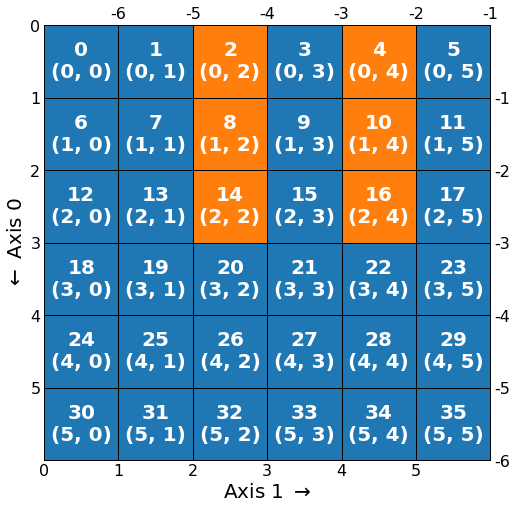

In [146]:
indexed = array[:3, (4,-4)]  # Change this line to see the effects
plot_fancy_index(array, indexed)

# Try
# array[(1,2,3), (3,4,5)]
# array[:3, (4, -4)]

When slicing the indexes represent the boundary of the cell, so slicing from 1:5 will select elements (1, 2, 3, 4).

Note the negative slicing guides along the top and right sides of the array.

## Loading and saving data

- https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html
- http://phy224.ca/08-reading-tabular/index.html
- https://www.numpy.org/devdocs/user/basics.io.genfromtxt.html

In [92]:
# Data from: https://www.itl.nist.gov/div898/strd/anova/AtmWtAg.html
data = np.genfromtxt('AtmWtAgt.csv', delimiter=',', skip_header=1)
data

array([[107.8681568, 107.8681079],
       [107.8681465, 107.8681344],
       [107.8681572, 107.8681513],
       [107.8681785, 107.8681197],
       [107.8681446, 107.8681604],
       [107.8681903, 107.8681385],
       [107.8681526, 107.8681642],
       [107.8681494, 107.8681365],
       [107.8681616, 107.8681151],
       [107.8681587, 107.8681082],
       [107.8681519, 107.8681517],
       [107.8681486, 107.8681448],
       [107.8681419, 107.8681198],
       [107.8681569, 107.8681482],
       [107.8681508, 107.8681334],
       [107.8681672, 107.8681609],
       [107.8681385, 107.8681101],
       [107.8681518, 107.8681512],
       [107.8681662, 107.8681469],
       [107.8681424, 107.868136 ],
       [107.868136 , 107.8681254],
       [107.8681333, 107.8681261],
       [107.868161 , 107.868145 ],
       [107.8681477, 107.8681368]])

Note the use of `delimiter=','` in the function. This is known as a keyword argument. Keyword arguments **always** come after positional arguments, but the order of keyword arguments amongst themselves does not matter.

The `skip_header=1` keyword argument tells the function to ignore the first row of the csv file.

In [152]:
# To access the individual columns we need to split the data.
# This can be done using array slicing and the tuple assignment trick that was 
# discussed in Lecture 0 in the context of swapping variables.

x, y = data[:,0], data[:,1]
x, y

(array([100., 100.]), array([107.8681465, 107.8681344]))

In [151]:
# To save a file use the savetxt function. It takes a filename, the data to save, and some optional arguments.
np.savetxt('test.csv', data, delimiter=',', header='x, y')

## For Matlab users

Here is guide on how to convert between Matlab syntax and NumPy syntax: https://www.numpy.org/devdocs/user/numpy-for-matlab-users.html